# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>План исследования<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации-о-данных" data-toc-modified-id="Изучение-общей-информации-о-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации о данных</a></span><ul class="toc-item"><li><span><a href="#Загрузим-данные-из-файла-в-датафрейм" data-toc-modified-id="Загрузим-данные-из-файла-в-датафрейм-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузим данные из файла в датафрейм</a></span></li><li><span><a href="#Посмотрим-общую-информацию-о-данных" data-toc-modified-id="Посмотрим-общую-информацию-о-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Посмотрим общую информацию о данных</a></span></li><li><span><a href="#Построим-гистограммы" data-toc-modified-id="Построим-гистограммы-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Построим гистограммы</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Поиск-аномальных-значений" data-toc-modified-id="Поиск-аномальных-значений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Поиск аномальных значений</a></span></li><li><span><a href="#Найдем-и-изучим-пропущенные-значения-в-столбцах" data-toc-modified-id="Найдем-и-изучим-пропущенные-значения-в-столбцах-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Найдем и изучим пропущенные значения в столбцах</a></span></li><li><span><a href="#Рассмотрим-типы-данных-в-столбцах" data-toc-modified-id="Рассмотрим-типы-данных-в-столбцах-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Рассмотрим типы данных в столбцах</a></span></li><li><span><a href="#Устраненим-дубликаты" data-toc-modified-id="Устраненим-дубликаты-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Устраненим дубликаты</a></span></li></ul></li><li><span><a href="#Посчитайте-и-добавьте-в-таблицу-новые-столбцы" data-toc-modified-id="Посчитайте-и-добавьте-в-таблицу-новые-столбцы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Посчитайте и добавьте в таблицу новые столбцы</a></span></li><li><span><a href="#Проведите-исследовательский-анализ-данных" data-toc-modified-id="Проведите-исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проведите исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучим-параметры-объкта" data-toc-modified-id="Изучим-параметры-объкта-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучим параметры объкта</a></span></li><li><span><a href="#Изучим,-как-быстро-продавались-квартиры.-Этот-параметр-показывает,-сколько-дней-было-размещено-каждое-объявление." data-toc-modified-id="Изучим,-как-быстро-продавались-квартиры.-Этот-параметр-показывает,-сколько-дней-было-размещено-каждое-объявление.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучим, как быстро продавались квартиры. Этот параметр показывает, сколько дней было размещено каждое объявление.</a></span></li><li><span><a href="#Изучим-какие-факторы-больше-всего-влияют-на-общую-(полную)-стоимость-объекта" data-toc-modified-id="Изучим-какие-факторы-больше-всего-влияют-на-общую-(полную)-стоимость-объекта-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Изучим какие факторы больше всего влияют на общую (полную) стоимость объекта</a></span></li><li><span><a href="#Посчитаем-среднюю-цену-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений-и-выделим-населённые-пункты-с-самой-высокой-и-низкой-стоимостью-квадратного-метра." data-toc-modified-id="Посчитаем-среднюю-цену-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений-и-выделим-населённые-пункты-с-самой-высокой-и-низкой-стоимостью-квадратного-метра.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.</a></span></li><li><span><a href="#Вычислим-среднюю-цену-каждого-километра-в-Санкт-Петербурге." data-toc-modified-id="Вычислим-среднюю-цену-каждого-километра-в-Санкт-Петербурге.-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Вычислим среднюю цену каждого километра в Санкт-Петербурге.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

### Изучение общей информации о данных

In [1]:
# имортируем библиотеки
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from pathlib import Path

In [2]:
# добавим форматирование вещественных чисел и темную тему для графиков
pd.options.display.float_format = '{:,.2f}'.format
plt.style.use('dark_background')

 #### Загрузим данные из файла в датафрейм

In [3]:
# откроем табл. и посмотрим первые 15 строк
try:
    data = pd.read_csv(Path.cwd() /'datasets'/'real_estate_data.csv', sep='\t')
except:
    print('Не удалось открыть файл')
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,...,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00


#### Посмотрим общую информацию о данных

In [4]:
# выведем основную информацию о датафрейме и его размерность
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

(23699, 22)

In [5]:
# переименуем столбец cityCenters_nearest, чтобы он был именование в snake case.
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

In [6]:
# посмотрим общее описание таблицы: максимумы, минимумы,  отклонение, среднее, 25, 50 и 75 процентов
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


In [7]:
# посмотрим на медианные значения у числовых столбцов
number_columns = data.select_dtypes(include='number')
number_columns.median()

total_images                   9.00
last_price             4,650,000.00
total_area                    52.00
rooms                          2.00
ceiling_height                 2.65
floors_total                   9.00
living_area                   30.00
floor                          4.00
kitchen_area                   9.10
balcony                        1.00
airports_nearest          26,726.00
city_centers_nearest      13,098.50
parks_around3000               0.00
parks_nearest                455.00
ponds_around3000               1.00
ponds_nearest                502.00
days_exposition               95.00
dtype: float64

#### Построим гистограммы

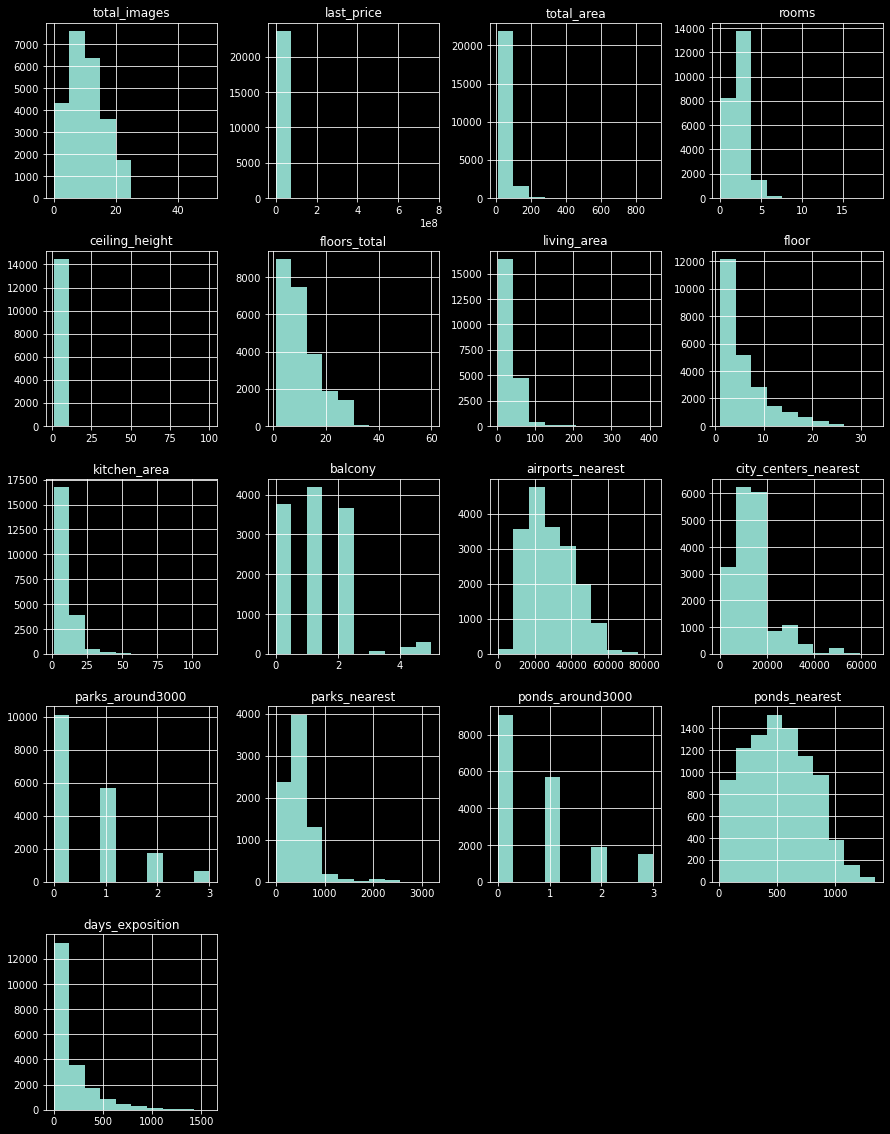

In [8]:
# посторим гистограммы для таблицы 
data.hist(bins=10, figsize=(15, 20))
plt.show()

Мы рассмотрели общую информацию о таблице и заметили:
 - у нас есть пустые (NaN) ячейки
 - нужно изменение типов данных и переименование столбца
 - у нас есть аномальные значения в таблице, например, ceiling_height в 100 м
 - у некоторых столбцов максимальное значение сильно выбивается и основные значения группируются вместе, например, гистограмма у last_price.

### Предобработка данных

#### Поиск аномальных значений

В total_images,	floor, balcony, airports_nearest, city_centers_nearest, 	parks_around3000,	parks_nearest,	ponds_around3000,	ponds_nearest максимальные и минимальные значения похожи на реальные.

В last_price, days_exposition, ceiling_height, total_area, floors_total, rooms, living_area,	kitchen_area	максимальные/минимальные значения не похожи на настоящие, рассмотрим эти столбцы подробнее.

In [9]:
# рассмотрим строку с максимальных значением цены
data[data['last_price'] == data['last_price'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,"763,000,000.00",400.00,2017-09-30T00:00:00,7,NaN,10.00,250.00,10,NaN,...,NaN,2.00,Санкт-Петербург,"25,108.00","3,956.00",1.00,530.00,3.00,756.00,33.00


В last_price большое максимальное значение не будем считать аномалией, т.к. элитная недвижимость стоит дорого. У этой квартиры площадь 400 м на последнем этаже, 4 км до центра Санкт-Петербурга.
Для анализа отфильтруем такие значения.

In [10]:
# возьмем цены, которые лежат в 99% цены
r = data['last_price'].quantile(0.9)
data = data[data['last_price'] <= r]

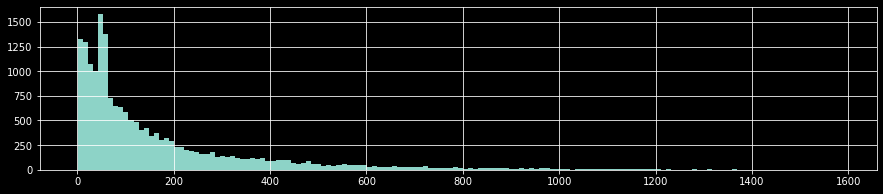

In [11]:
# построим гистаграмму days_exposition
data.days_exposition.hist(bins = 150, figsize = (15,3));

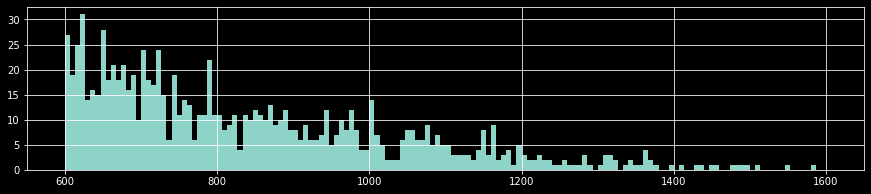

In [12]:
# рассмотрим ближе отрезок от 600 дней
data.days_exposition.hist(bins = 150, figsize = (15,3), range = (600,1600));

In [13]:
# отфильтрум объявления, у которых дни экспозиции превышают 1200
data = data.query('days_exposition <= 1200 or days_exposition != days_exposition')

In [14]:
# посмотрим как изменился размер датафрейма
data.shape

(21271, 22)

In [15]:
# рассмотрим уникальные значения в столбце ceiling_height
np.sort(data['ceiling_height'].unique())

array([ 1.  ,  1.2 ,  1.75,  2.  ,  2.2 ,  2.25,  2.3 ,  2.34,  2.4 ,
        2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,  2.53,
        2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,  2.62,
        2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,  2.71,
        2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,  2.8 ,
        2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,  2.89,
        2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,  2.99,
        3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,  3.07,  3.08,
        3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,  3.16,  3.17,
        3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,  3.26,  3.27,
        3.28,  3.3 ,  3.31,  3.32,  3.33,  3.34,  3.35,  3.36,  3.37,
        3.38,  3.39,  3.4 ,  3.42,  3.44,  3.45,  3.46,  3.47,  3.48,
        3.49,  3.5 ,  3.54,  3.55,  3.56,  3.57,  3.59,  3.6 ,  3.62,
        3.63,  3.65,  3.66,  3.67,  3.7 ,  3.75,  3.78,  3.8 ,  3.83,
        3.85,  3.88,

Значения больше 10 м похожи на аномалии, в которых неправильно поставили запятую. Заменив эти значения передвинув запятую, например 24 м на 2.4 м. Значения меньше 2.4 м., заменим на 2.4 м, т.к. по СанПин это минимальная высота потолка

In [16]:
#  фун-ия для замены значения высоты потолка
def replacy_ceiling_height(height):
    if 10 < height <= 24 or height <= 2.4:
        return 2.4
    if height > 24:
        return height/10
    return height

In [17]:
#  заменим аномальные значения высоты потолка и посмотрим на полученные значения
data['ceiling_height'] = data['ceiling_height'].apply(replacy_ceiling_height)
np.sort(data['ceiling_height'].unique())

array([2.4 , 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53, 2.54,
       2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64, 2.65,
       2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75, 2.76,
       2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87,
       2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.99,
       3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1 ,
       3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2 , 3.21, 3.22,
       3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.3 , 3.31, 3.32, 3.33, 3.34,
       3.35, 3.36, 3.37, 3.38, 3.39, 3.4 , 3.42, 3.44, 3.45, 3.46, 3.47,
       3.48, 3.49, 3.5 , 3.54, 3.55, 3.56, 3.57, 3.59, 3.6 , 3.62, 3.63,
       3.65, 3.66, 3.67, 3.7 , 3.75, 3.78, 3.8 , 3.83, 3.85, 3.88, 3.9 ,
       3.95, 3.98, 4.  , 4.06, 4.1 , 4.15, 4.19, 4.2 , 4.3 , 4.37, 4.4 ,
       4.5 , 4.7 , 5.  , 5.3 , 5.8 , 8.  , 8.3 ,  nan])

In [18]:
# рассмотрим уникальные значения в столбце floors_total
np.sort(data['floors_total'].unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

In [19]:
# значения больше 52 этажей похожи на аномалию, если таких значений меньше 50, то удалим такие строки. 
# Если таких значений больше 50, то значит в городе много таких домов и это не аномалия.
if data.query('floors_total >= 52')['floors_total'].count() < 50:
    data = data.query('not floors_total >= 52 or floors_total != floors_total')

In [20]:
# выведем кол-во квартир с разными кол-вами комнат
data.rooms.value_counts().to_frame()

,rooms
1,7977
2,7483
3,4793
4,704
0,195
5,105
6,11
7,1


In [21]:
# Комнат меньше одной не может быть, поэтому строки с 0 удалим, если их меньше 100. 
#  Иначе заменим на 1, т.к. даже в студии одна комната.
# отфильтруем данные с кол-вом комнат больше 6
if data.query('rooms == 0')['rooms'].count() < 100:
    data = data.query('rooms > 0')
else:
    data["rooms"].mask(data['rooms'] == 0, 1, inplace=True)

data = data.query('rooms < 6 or rooms != rooms')
np.sort(data['rooms'].unique())

array([1, 2, 3, 4, 5], dtype=int64)

In [22]:
# выведем общую инф. о жилой площаде
data['living_area'].apply(['mean', 'min', 'max', 'median'])

mean      30.18
min        2.00
max      112.00
median    29.00
Name: living_area, dtype: float64

In [23]:
# выведем общую инф. о площаде кухни
data['kitchen_area'].apply(['mean', 'min', 'max', 'median'])

mean      9.53
min       1.30
max      64.00
median    9.00
Name: kitchen_area, dtype: float64

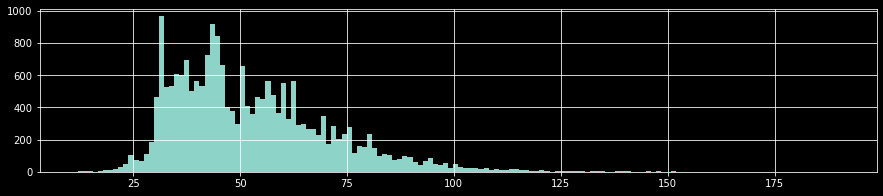

In [24]:
# построим гистограмму распределения площади
data.total_area.hist(bins = 150, figsize = (15,3));

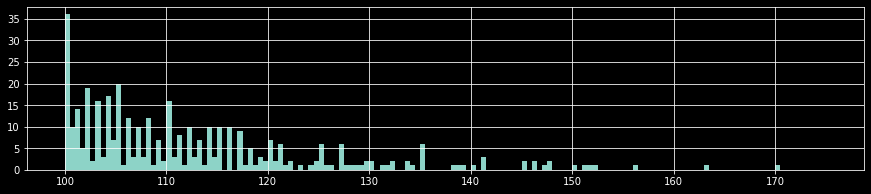

In [25]:
# расммотрим ближе промежуток с 100 до 175
data.total_area.hist(bins = 150, figsize = (15,3), range=(100, 175));

In [26]:
# посмотрим как изменился размер датафрейма
data.shape

(21257, 22)

In [27]:
# минимальной жилой площадью на одного человека является 10 м² по СанПиН. 
# минимальная площадь кухни по СанПиН - 5 м²
# отфильтруем квартиры с площадью более 160 м²
data = data.query('living_area >= 10 or living_area != living_area')
data = data.query('kitchen_area >= 5 or kitchen_area != kitchen_area')  
data = data.query('total_area < 150 or total_area != total_area')

data[['living_area', 'kitchen_area', 'total_area']].apply(['mean', 'min', 'max', 'median'])

,living_area,kitchen_area,total_area
mean,30.22,9.55,52.67
min,10.00,5.00,12.00
max,108.00,64.00,147.80
median,29.00,9.00,49.00


In [28]:
# посмотрим как изменился размер датафрейма
data.shape

(21120, 22)

In [29]:
# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 
          'living_area',  'kitchen_area', 'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,120.00","21,120.00","12,737.00","18,565.00","21,120.00","19,467.00","19,086.00","21,120.00","21,049.00"
min,1.00,12.00,2.40,1.00,"12,190.00",10.00,5.00,1.00,1.00
max,5.00,147.80,8.30,"1,200.00","10,912,400.00",108.00,64.00,33.00,37.00


In [30]:
# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .9976])  
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.010000,1.00,25.01,2.50,4.00,"990,000.00",13.00,5.00,1.00,2.00
0.500000,2.00,49.00,2.60,91.00,"4,390,000.00",29.00,9.00,4.00,9.00
0.900000,3.00,77.80,3.00,431.00,"7,800,000.00",47.60,14.00,13.00,22.00
0.997600,5.00,124.29,4.00,"1,125.89","10,800,000.00",80.00,30.00,25.00,28.00


Мы посмотрели кол-во пропусков в таблице, заменили их в ceiling_height, living_area, kitchen_area, balcony, locality_name.

Изменили тип данных в first_day_exposition, balcony, rooms, total_images, floors_total.

Удалили дубликаты в locality_name. Заменили/отфильтровали аномальные значения в ceiling_height, floors_total, rooms, living_area, days_exposition, last_price. 

#### Найдем и изучим пропущенные значения в столбцах

In [31]:
# выведем кол-во пропусков в столбцах
pd.DataFrame(
    (data.isna().mean())
    .to_frame()
    .rename(columns = {0:'space'})
    .sort_values(by = 'space', ascending = True)
).style.background_gradient('coolwarm').format({'space':'{:.1%}'})

,space
total_images,0.0%
open_plan,0.0%
floor,0.0%
rooms,0.0%
studio,0.0%
total_area,0.0%
last_price,0.0%
first_day_exposition,0.0%
locality_name,0.2%
floors_total,0.3%


In [32]:
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

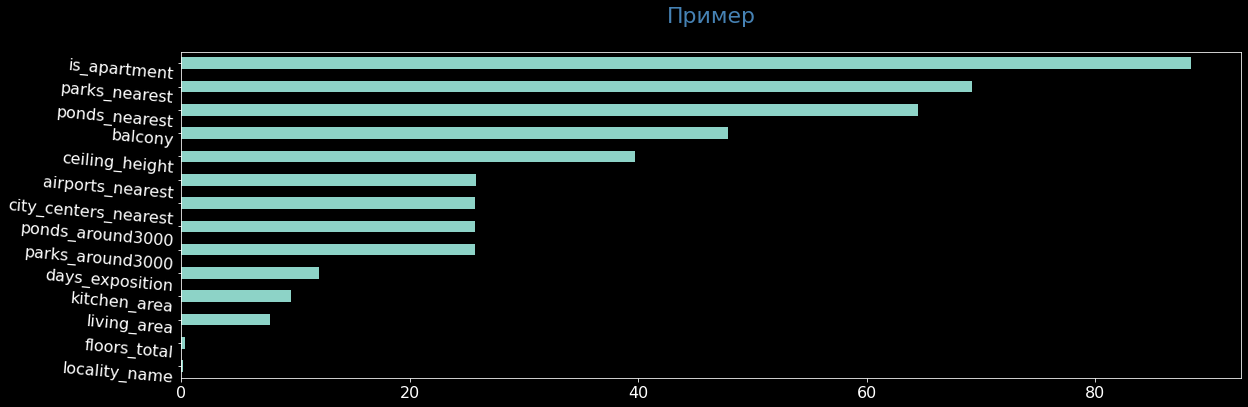

In [33]:
pass_value_barh(data)

В 15 столбцах есть пропущенные значения: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, city_сenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.

1. В ceiling_height заменим на медианные значения из-за большой разницы максимального и минимального значения, при этом учтем разницу потолков в новых и старых районах (8 км от центра), т.к. высота потолка в старых и новых домах разная.
2. В living_area, kitchen_area заменим пропуски с помощью линейной регрессии. Для этого найдем коэф. линейного уравнения y = b0 + b1*x1+ b2*x2 + ... + bn*xn, а затем подставим найденные коэф. и рассчитаем значение. Надо будет учитывать, что карелляция параметров параметров для рассчета и искомого парметра возрастет.
2. В balcony заменим на 0, т.к. отсутсвие значений в этой колонке может означать отсутсвие балкона в квартире.
3. В locality_name пропуски заменим на unknown, т.к. это категориальная переменная, которую нельзя восстановить
4. В floors_total, city_сenters_nearest, airports_nearest,parks_around, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, is_apartment пропуски оставим. 

Удалять пустые строки пока не будем, чтобы не потерять большое кол-во данных и чтобы не потерять "хорошие" (без аномалий) строки.

In [34]:
# функция для замены пропусков высоты потолка на медианное значение в зависимости от расстояния до центра города
def replace_ceiling_height(ceiling_height, old_height, new_height, mean_height):
    if math.isnan(ceiling_height):
        if ceiling_height <= 8000:
            return old_height
        if ceiling_height >= 8000:
            return new_height
        return mean_height
    else:
        return ceiling_height

In [35]:
# функция создания для рассчета коэф-тов линейной регрессии
def linear_regression(df, predicted_parameter, parameter):
    X = df[['rooms', 'floor', 'total_area', 'last_price', parameter]] 
    y = df[predicted_parameter]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    regressor = LinearRegression() 
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    df_predict = pd.DataFrame(
        {'Actual': y_test, 
         'Predicted': y_pred, 
         'mean': df[predicted_parameter].mean()
        }
    )
    coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient']).T
    zero_coefficient = regressor.intercept_
    coeff_df['zero_coefficient'] = zero_coefficient
    return coeff_df, df_predict

In [36]:
# функция для замены нулевых значений площади на рассчитанное по уравнению линейной регрессии
def predict_area(row, predicted_parameter, parameter, coeff):
    rooms = row['rooms']
    floor = row['floor']
    total_area = row['total_area']
    last_price = row['last_price']
    other_area = row[parameter]
    area = row[predicted_parameter]
    if math.isnan(area):
        area = (
            coeff['rooms']['Coefficient']*rooms 
            + coeff['floor']['Coefficient']*floor 
            + coeff['total_area']['Coefficient']*total_area
            + coeff['last_price']['Coefficient']*last_price
            + coeff[parameter]['Coefficient']*other_area
            + coeff['zero_coefficient']['Coefficient']
               )
    return area

In [37]:
'''
подготовим данные для обучения регрессионной модели, 
возьмем только колонки last_price, rooms, living_area, floor, total_area, kitchen_area, 
т.к. они больше всего влияют на площадь, и удалим пустые строки
'''

col = ['last_price', 'rooms', 'living_area', 'floor','total_area', 'kitchen_area']
data_teacher = data.query("living_area == living_area and kitchen_area == kitchen_area")
data_teacher = data_teacher.query('0.9*total_area >= (living_area + kitchen_area)')

data_living_area = data_teacher.query("living_area == living_area")
data_living_area = data_living_area[col]
data_living_area = data_living_area.dropna()
coeff_df_living_area, df_predict = linear_regression(data_living_area, 'living_area', 'kitchen_area')

data_kitchen_area = data_teacher.query("kitchen_area == kitchen_area")
data_kitchen_area = data_kitchen_area[col]
data_kitchen_area = data_kitchen_area.dropna()
coeff_df_kitchen_area, df_predict = linear_regression(data_kitchen_area, 'kitchen_area', 'living_area')

In [38]:
# посмотрим на описание данных до замены
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"21,120.00","21,120.00","21,120.00","21,120.00","12,737.00","21,049.00","19,467.00","21,120.00","19,086.00","11,014.00","15,673.00","15,684.00","15,685.00","6,495.00","15,685.00","7,501.00","18,565.00"
mean,9.66,"4,746,872.41",52.67,1.92,2.68,10.77,30.22,5.88,9.55,1.13,"28,955.16","15,080.40",0.55,487.20,0.70,532.55,168.48
std,5.52,"2,083,411.95",18.10,0.88,0.25,6.62,13.00,4.91,3.70,1.03,"12,996.06","8,496.16",0.76,323.14,0.88,276.37,200.11
min,0.00,"12,190.00",12.00,1.00,2.40,1.00,10.00,1.00,5.00,0.00,0.00,208.00,0.00,1.00,0.00,16.00,1.00
25%,6.00,"3,300,000.00",39.00,1.00,2.50,5.00,18.00,2.00,7.00,0.00,"18,052.00","10,732.50",0.00,289.50,0.00,318.00,43.00
50%,9.00,"4,390,000.00",49.00,2.00,2.60,9.00,29.00,4.00,9.00,1.00,"27,148.00","13,713.00",0.00,456.00,0.00,521.00,91.00
75%,14.00,"5,900,000.00",63.00,3.00,2.75,16.00,39.00,8.00,11.00,2.00,"37,717.00","16,779.00",1.00,613.00,1.00,741.00,216.00
max,39.00,"10,912,400.00",147.80,5.00,8.30,37.00,108.00,33.00,64.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,200.00"


In [39]:
# заменим прорущенные значения
old_district_ceiling_height = (
    data
    .query('city_centers_nearest <= 8000')
    .agg({'ceiling_height': 'mean'})['ceiling_height']
                              )

new_district_ceiling_height = (
    data
    .query('city_centers_nearest >= 8000')
    .agg({'ceiling_height': 'mean'})['ceiling_height']
                              )

data['ceiling_height'] = data['ceiling_height'].apply(
    replace_ceiling_height,
    old_height=old_district_ceiling_height, 
    new_height=new_district_ceiling_height, 
    mean_height=data['ceiling_height'].mean()
)

data['living_area'] = data.apply(
    predict_area, 
    predicted_parameter='living_area', 
    parameter='kitchen_area',
    coeff=coeff_df_living_area, 
    axis=1
)

data['kitchen_area'] = data.apply(
    predict_area, 
    predicted_parameter='kitchen_area',
    parameter='living_area',
    coeff=coeff_df_kitchen_area, 
    axis=1
)

data['balcony'] = data['balcony'].fillna(0)
data['locality_name'] = data['locality_name'].fillna('unknown')

In [40]:
# посмотрим на описание данных после замены
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"21,120.00","21,120.00","21,120.00","21,120.00","21,120.00","21,049.00","19,830.00","21,120.00","19,830.00","21,120.00","15,673.00","15,684.00","15,685.00","6,495.00","15,685.00","7,501.00","18,565.00"
mean,9.66,"4,746,872.41",52.67,1.92,2.68,10.77,30.22,5.88,9.47,0.59,"28,955.16","15,080.40",0.55,487.20,0.70,532.55,168.48
std,5.52,"2,083,411.95",18.10,0.88,0.19,6.62,12.99,4.91,3.71,0.94,"12,996.06","8,496.16",0.76,323.14,0.88,276.37,200.11
min,0.00,"12,190.00",12.00,1.00,2.40,1.00,10.00,1.00,0.15,0.00,0.00,208.00,0.00,1.00,0.00,16.00,1.00
25%,6.00,"3,300,000.00",39.00,1.00,2.60,5.00,18.00,2.00,7.00,0.00,"18,052.00","10,732.50",0.00,289.50,0.00,318.00,43.00
50%,9.00,"4,390,000.00",49.00,2.00,2.68,9.00,29.00,4.00,9.00,0.00,"27,148.00","13,713.00",0.00,456.00,0.00,521.00,91.00
75%,14.00,"5,900,000.00",63.00,3.00,2.68,16.00,39.00,8.00,11.00,1.00,"37,717.00","16,779.00",1.00,613.00,1.00,741.00,216.00
max,39.00,"10,912,400.00",147.80,5.00,8.30,37.00,108.00,33.00,64.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,200.00"


In [41]:
# после заполнения пропусков в площади кухни вновь появились значения мень 5 м2, отфильтруем их
data = data.query('kitchen_area >= 5 or kitchen_area != kitchen_area') 
data.shape

(20932, 22)

#### Рассмотрим типы данных в столбцах

Мы вовдили общую информацию о таблице, в которой видели типы столбцов. В столбце first_day_exposition указана дата в строковом формате, чтобы работать с ней (сравнивать, складывать, вычитать и др.) преобразуем ее к типу datetime.
В balcony, rooms и total_images поменяем тип данных на целочисленный.
В floors_total также заменим тип данных на целочислинный, но сначала удалим пустые строки.

In [42]:
# заменяем тип данных и выведем общую информацию для проверки 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['balcony'] = data['balcony'].astype('int64')
data['rooms'] = data['rooms'].astype('int64')
data['total_images'] = data['total_images'].astype('int64')
data = data.dropna(subset=['floors_total'])
data['floors_total'] = data['floors_total'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20862 entries, 1 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20862 non-null  int64         
 1   last_price            20862 non-null  float64       
 2   total_area            20862 non-null  float64       
 3   first_day_exposition  20862 non-null  datetime64[ns]
 4   rooms                 20862 non-null  int64         
 5   ceiling_height        20862 non-null  float64       
 6   floors_total          20862 non-null  int64         
 7   living_area           19600 non-null  float64       
 8   floor                 20862 non-null  int64         
 9   is_apartment          2442 non-null   object        
 10  studio                20862 non-null  bool          
 11  open_plan             20862 non-null  bool          
 12  kitchen_area          19600 non-null  float64       
 13  balcony         

#### Устраненим дубликаты

In [43]:
# выведем кол-во дубликатов в locality_name
data['locality_name'].duplicated().sum() 

20499

In [44]:
# выведем уникальные значения в столбце locality_name и кол-во таких значений
print(len(data['locality_name'].unique())) #365
data['locality_name'].unique()

363


array(['посёлок Шушары', 'Санкт-Петербург', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'Павловск', 'деревня Лесколово', '

In [45]:
# заменим неявные дубликаты: для этого создадим словарь с паттерном для замены в качестве ключа 
 # и заменой в качестве значения. Посмотрим как изменилось кол-во уникальных значений
regex_replace = {
    r'(?:городской|коттеджный)(?: пос[ёе]лок)|пос[ёе]лок городского типа|пос[ёе]лок': 'поселок',
    r'садоводческое некоммерческое товарищество': 'садовое товарищество',
    r'при железнодорожной станции': 'станции',
}
for key, value in regex_replace.items():
    data = data.replace(to_replace=key, value=value, regex=True)
len(data['locality_name'].unique()) #320

318

In [46]:
# Кол-во уникальных значений уменьшилось с 365 до 320, значит изменеия сработали. Посмотрим еще раз 
# на уникальные значения
data['locality_name'].unique()

array(['поселок Шушары', 'Санкт-Петербург', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'деревня Куттузи', 'поселок Аннино', 'поселок Ефимовский',
       'поселок Плодовое', 'деревня Заклинье', 'поселок Торковичи',
       'поселок Первомайское', 'Красное Село', 'поселок Понтонный',
       'Сясьстрой', 'деревня Старая', 'Павловск', 'деревня Лесколово',
       'поселок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Зеленогорск',

### Посчитайте и добавьте в таблицу новые столбцы

Добавим в таблицу новые столбцы:
 - цена одного квадратного метра;
 - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
 - месяц публикации объявления;
 - год публикации объявления;
 - тип этажа квартиры (значения — «‎первый», «последний», «другой»);
 - расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [47]:
# фун-ия преобразования этажа по типу «первый», «последний», «другой»
def floor_type(row):
    try:
        floor = row['floor']
        floors_total = row['floors_total']
        if floor == 1:
            return 'первый'
        if floor == floors_total:
            return 'последний'
        if floor == 0 or floor < 0:
            return 'подвал'
        return 'другой'
    except:
        return 'не удалось определить тип этажа'

In [48]:
# цена одного квадратного метра
data['price_of_one_square_meter'] = data['last_price']/data['total_area']
# день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['day_of_week_publications_ads'] = data['first_day_exposition'].dt.weekday
# месяц публикации объявления
data['month_publications_ads'] = data['first_day_exposition'].dt.month
# год публикации объявления
data['year_publications_ads'] = data['first_day_exposition'].dt.year
# тип этажа квартиры (значения — «первый», «последний», «другой»)
data['type_floor'] = data.apply(floor_type, axis=1)
# расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)
data['city_centers_nearest_km'] = (data['city_centers_nearest']/1000).round(0)
# выведем первые строки табл. с новыми столбцами
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_one_square_meter,day_of_week_publications_ads,month_publications_ads,year_publications_ads,type_floor,city_centers_nearest_km
1,7,"3,350,000.00",40.40,2018-12-04,1,2.68,11,18.60,1,NaN,...,NaN,0.00,NaN,81.00,"82,920.79",1,12,2018,первый,19.00
2,10,"5,196,000.00",56.00,2015-08-20,2,2.68,5,34.30,4,NaN,...,90.00,2.00,574.00,558.00,"92,785.71",3,8,2015,другой,14.00
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,112.00,1.00,48.00,121.00,"100,000.00",1,6,2018,другой,8.00
5,10,"2,890,000.00",30.40,2018-09-10,1,2.68,12,14.40,5,NaN,...,NaN,NaN,NaN,55.00,"95,065.79",0,9,2018,другой,NaN
6,6,"3,700,000.00",37.30,2017-11-02,1,2.68,26,10.60,6,NaN,...,NaN,0.00,NaN,155.00,"99,195.71",3,11,2017,другой,19.00


### Проведите исследовательский анализ данных

####  Изучим параметры объкта

    Изучим следующие параметры объектов:
    - общая площадь - total_area;
    - жилая площадь - living_area;
    - площадь кухни - kitchen_area;
    - цена объекта - last_price;
    - количество комнат - rooms;
    - высота потолков - ceiling_height;
    - этаж квартиры - floor;
    - тип этажа квартиры («первый», «последний», «другой») - type_floor;
    - общее количество этажей в доме - floors_total;
    - расстояние до центра города в метрах - city_centers_nearest;
    - расстояние до ближайшего аэропорта - airports_nearest;
    - расстояние до ближайшего парка - parks_nearest;
    - день публикации объявления - day_of_week_publications_ads
    - месяц публикации объявления - month_publications_ads
    - год публикации объявления - year_publications_ads

In [49]:
# сделаем табл., в которой только колонки с изучаемыми параметрами и посмотрим числовые параметры этой таблицы.
columns_research = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 
                    'floor', 'floors_total', 'city_centers_nearest', 'airports_nearest', 'parks_nearest', 
                    'type_floor', 'day_of_week_publications_ads', 
                    'month_publications_ads', 'year_publications_ads']
data_research = data[columns_research]
data_research.describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,city_centers_nearest,airports_nearest,parks_nearest,day_of_week_publications_ads,month_publications_ads,year_publications_ads
count,"20,862.00","19,600.00","19,600.00","20,862.00","20,862.00","20,862.00","20,862.00","20,862.00","15,525.00","15,514.00","6,437.00","20,862.00","20,862.00","20,862.00"
mean,52.88,30.29,9.51,"4,762,469.23",1.93,2.68,5.86,10.73,"15,079.48","28,980.07",486.72,2.58,6.40,"2,017.39"
std,17.98,12.97,3.69,"2,082,075.05",0.88,0.19,4.88,6.60,"8,503.28","12,994.00",321.39,1.80,3.49,1.01
min,13.00,10.00,5.00,"12,190.00",1.00,2.40,1.00,1.00,208.00,0.00,1.00,0.00,1.00,"2,014.00"
25%,39.00,18.00,7.00,"3,300,000.00",1.00,2.60,2.00,5.00,"10,723.00","18,078.25",290.00,1.00,3.00,"2,017.00"
50%,49.00,29.00,9.00,"4,400,000.00",2.00,2.68,4.00,9.00,"13,707.00","27,186.50",456.00,3.00,6.00,"2,017.00"
75%,63.00,39.00,11.00,"5,925,492.75",3.00,2.68,8.00,16.00,"16,755.00","37,780.50",613.00,4.00,10.00,"2,018.00"
max,147.80,108.00,64.00,"10,912,400.00",5.00,8.30,33.00,37.00,"65,968.00","84,869.00","3,190.00",6.00,12.00,"2,019.00"


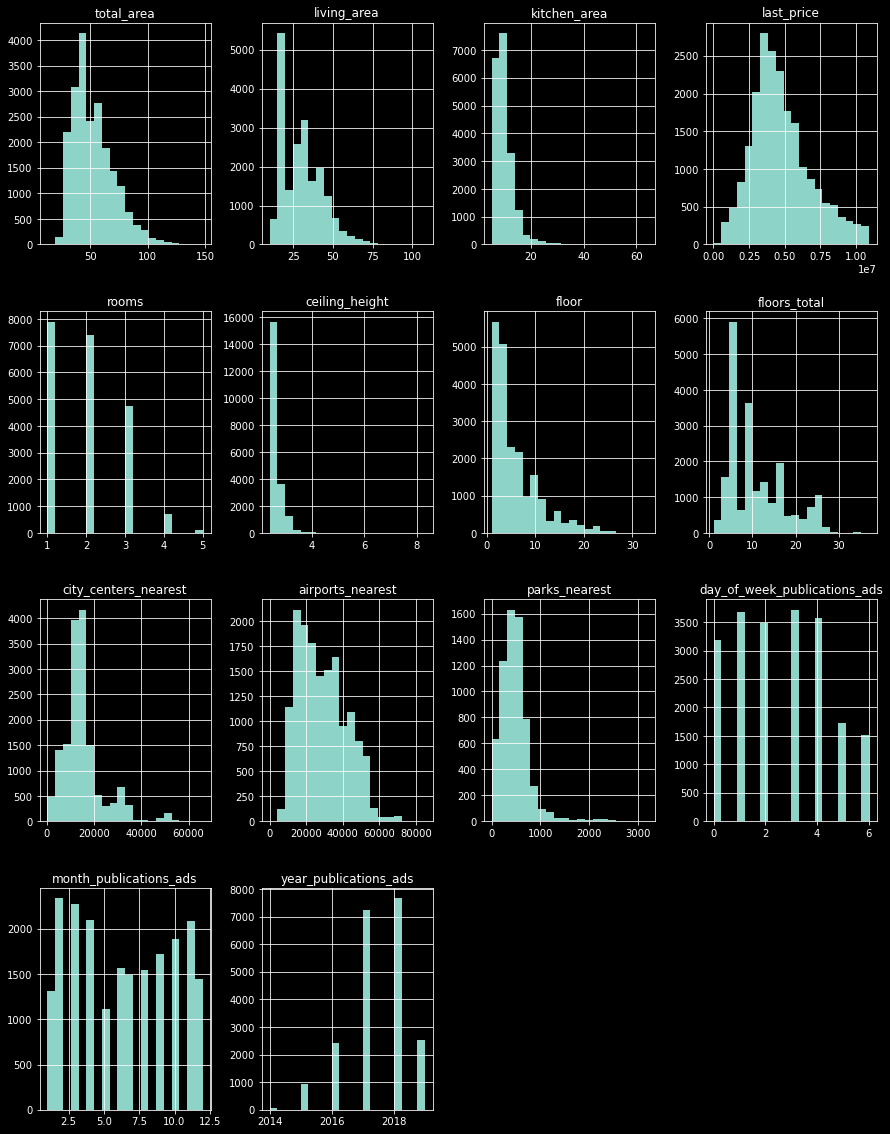

In [50]:
# постороим гистаграммы для изучаемой таблицы
data_research.hist(bins=20, figsize=(15, 20))
plt.show()

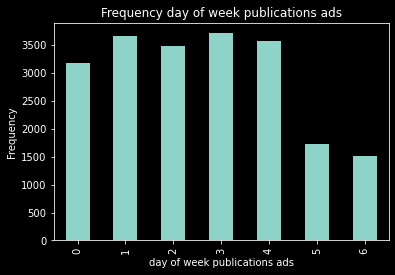

In [51]:
# для категориальных величин построим столбчатые диаграммы
categorical_variables_data_research = ['type_floor', 'day_of_week_publications_ads', 
                                       'month_publications_ads', 'year_publications_ads']
# столбчатая диаграмма для дней недели публикации объявления
ax = data['day_of_week_publications_ads'].value_counts().sort_index(ascending=True).plot.bar()
ax.set_title("Frequency day of week publications ads")
ax.set_xlabel("day of week publications ads")
ax.set_ylabel("Frequency")
plt.show()

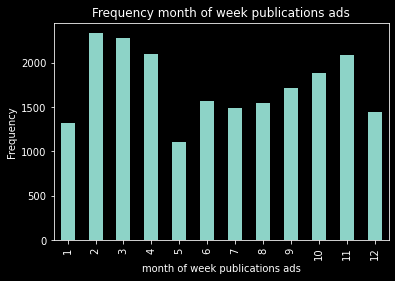

In [52]:
# столбчатая диаграмма для месяцев публикации объявления
ax = data['month_publications_ads'].value_counts().sort_index(ascending=True).plot.bar()
ax.set_title("Frequency month of week publications ads")
ax.set_xlabel("month of week publications ads")
ax.set_ylabel("Frequency")
plt.show()

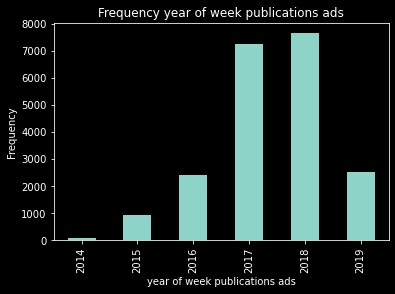

In [53]:
# столбчатая диаграмма по годам публикации объявления
ax = data['year_publications_ads'].value_counts().sort_index(ascending=True).plot.bar()
ax.set_title("Frequency year of week publications ads")
ax.set_xlabel("year of week publications ads")
ax.set_ylabel("Frequency")
plt.show()

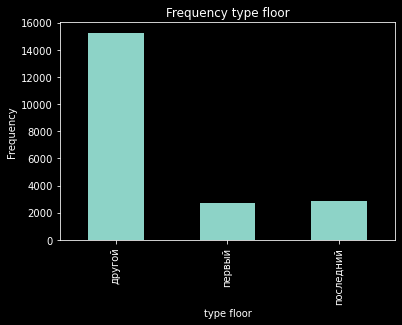

In [54]:
# столбчатая диаграмма для типа этажа
ax = data['type_floor'].value_counts().sort_index(ascending=True).plot.bar()
ax.set_title("Frequency type floor")
ax.set_xlabel("type floor")
ax.set_ylabel("Frequency")
plt.show()

Для total_area, living_area, kitchen_area, last_price, rooms, ceiling_height, floor, parks_nearest распределения похожи на распределения Пуасона. У floors_total, city_centers_nearest, airports_nearest нет распределения, а значит кол-во объявлений не связано с этим параметром.

Рассмотрев дни публикации можно заметить, что в выходные объявления публикуют реже, чем в будни. Вторник и четверг - самые публикуемы дни. 

Рассмотрев месяцы публикации иожно заметить, что февраль, март и апрель - самые публикуемые месяцы, в мае пуликуют меньше всего объявлений.

Рассмотрев года публикации иожно заметить, что в 2014 году объявлений было опубликовано мало объявлений, в 2017 и 2018 больше всего объявлений.

Рассмотрев типы этажей, меньше всего объявлений для первого этажа, а максимальное для других (ни первый, ни последний) этажей.

#### Изучим, как быстро продавались квартиры. Этот параметр показывает, сколько дней было размещено каждое объявление.

In [55]:
# рассмотрим минимальное, максимальное, среднее и мелианное значения в кол-ве дней размещения объявления
data['days_exposition'].apply(['min', 'max', 'mean', 'median'])

min          1.00
max      1,200.00
mean       168.88
median      91.00
Name: days_exposition, dtype: float64

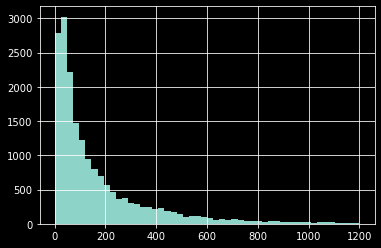

In [56]:
# построим гистограмму
data['days_exposition'].hist(bins=50)
plt.show()

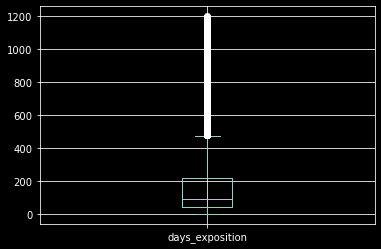

In [57]:
# построим ящик с усами
data['days_exposition'].plot.box(grid=True)
plt.show()

У кол-ва дней размещения объявлений распределение Пуасона. В среднем продажа квартиры занимает около 100 дней. Для объявлений 500 дней - долгая продажа, 50 дней - быстрая продажа.

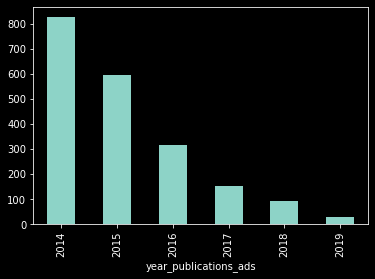

In [58]:
# посмотрим как менялось кол-во дней размещения в зависимости от года
data.groupby(by='year_publications_ads')['days_exposition'].mean().plot.bar()
plt.show()

In [59]:
# посмотрим как меняется кол-во дней размещения в зависимости от располажения. 
# Выведем 10 самых быстро и долго продающихся городов
data_city_centers_nearest_days_exposition = (
    data.groupby(by='city_centers_nearest_km')['days_exposition']
    .mean()
    .sort_values(ascending=False)
)
data_city_centers_nearest_days_exposition.head(10)

city_centers_nearest_km
66.00   1,194.00
65.00     582.00
43.00     342.67
1.00      267.92
53.00     266.88
54.00     250.67
40.00     247.31
5.00      240.04
61.00     240.00
4.00      231.25
Name: days_exposition, dtype: float64

In [60]:
# 10 самых долго продающихся городов
data_city_centers_nearest_days_exposition.tail(10)

city_centers_nearest_km
23.00   146.29
15.00   146.27
20.00   129.88
25.00   113.02
48.00    99.43
39.00    91.00
45.00    60.00
59.00    24.00
63.00    13.00
57.00      NaN
Name: days_exposition, dtype: float64

In [61]:
# посмотрим как менялось кол-во дней размещения в зависимости от кол-ва фотографий
pd.DataFrame(
    data
    .groupby(by='total_images')['days_exposition']
    .mean()
).style.background_gradient('coolwarm').format({'days_exposition':'{:.1f}'})

,days_exposition
total_images,
0,139.7
1,180.6
2,192.4
3,182.3
4,181.5
5,176.9
6,184.4
7,176.2
8,173.8


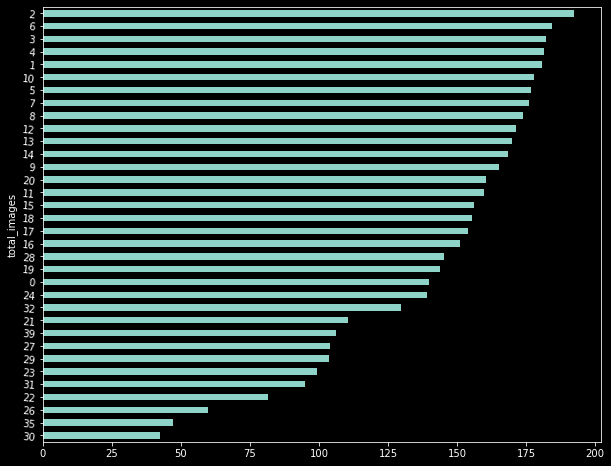

In [62]:
# посмотрим как менялось кол-во дней размещения в зависимости от кол-ва фотографий на графике
(
    data
    .groupby(by='total_images')['days_exposition']
    .mean().sort_values()
    .plot.barh(figsize=(10, 8), rot = -5)
);

In [63]:
# посмотрим как менялось кол-во дней размещения в зависимости от цены
data_last_price_days_exposition = (
    data
    .groupby(by='last_price')['days_exposition']
    .mean().sort_values()
)
data_last_price_days_exposition.head(10)

last_price
7,806,000.00   2.00
5,148,000.00   3.00
6,417,500.00   3.00
5,835,000.00   3.00
3,134,850.00   3.00
5,636,656.00   3.00
8,449,000.00   3.00
5,748,000.00   3.00
7,740,000.00   3.00
3,577,388.00   3.00
Name: days_exposition, dtype: float64

In [64]:
data_last_price_days_exposition.tail(10)

last_price
10,510,000.00   NaN
10,580,800.00   NaN
10,599,999.00   NaN
10,648,000.00   NaN
10,660,000.00   NaN
10,681,500.00   NaN
10,737,350.00   NaN
10,767,773.00   NaN
10,898,000.00   NaN
10,912,400.00   NaN
Name: days_exposition, dtype: float64

Рассмотрев скорость продажи квартиры по годам видно, что с каждым следующим годом квартира продавалась быстрее.

На скорость продаж не влияет населенный пункт, так самые быстро продаваемые объекты и 
самые медленно продаваемые объекты находятся близко и далеко от центра.

Кол-во фотографий влияет на скорость размещения: чем больше фотографий, тем быстрее продажи.
    
Цена также напрямую не влияет на кол-во дней размщения, среди 10 самых быстро продаваемых квартир 
есть дешевые и дорогие квартиры. Надо рассматривать более сложную связь не только цену, но и расположение.

#### Изучим какие факторы больше всего влияют на общую (полную) стоимость объекта

 Какие факторы больше всего влияют на общую (полную) стоимость объекта?

    Изучим, зависит ли цена от:
     - общей площади;
     - жилой площади;
     - площади кухни;
     - количества комнат;
     - этажа, на котором расположена квартира (первый, последний, другой);
     - даты размещения (день недели, месяц, год).

In [65]:
# создадим табл., которая будет содержать цену и некатегориальные переменные, которые мы хотим проверить 
#  и построим матрицу корреляции, рассмотрим столбец 
col_research_price = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']
#research_price_impact = data.pivot_table(index='last_price', values=col_research_price)
research_price_impact = data[col_research_price]
research_price_impact.corr()['last_price']

last_price     1.00
total_area     0.68
living_area    0.56
kitchen_area   0.47
rooms          0.43
Name: last_price, dtype: float64

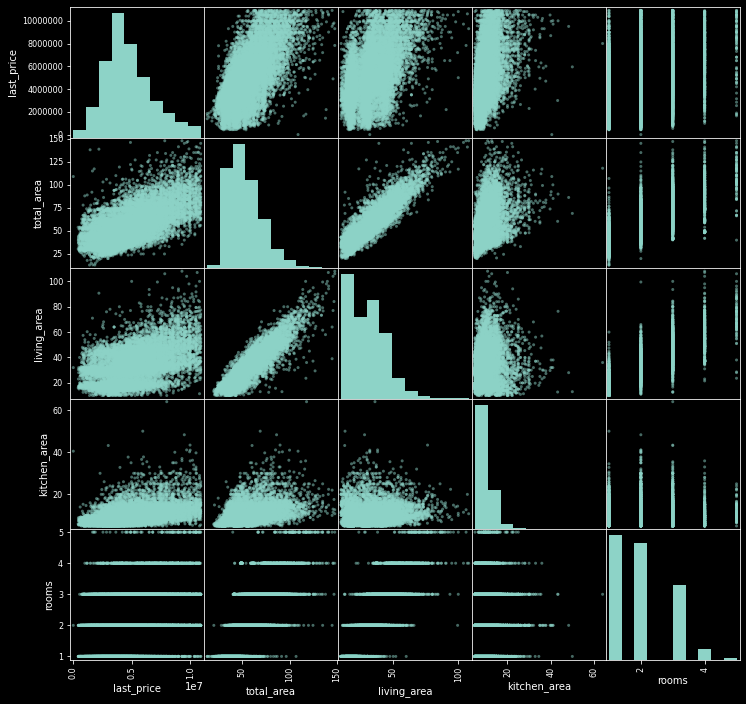

In [66]:
# построим матрицу диаграмм рассеяния
pd.plotting.scatter_matrix(research_price_impact, figsize=(12, 12)) 
plt.show()

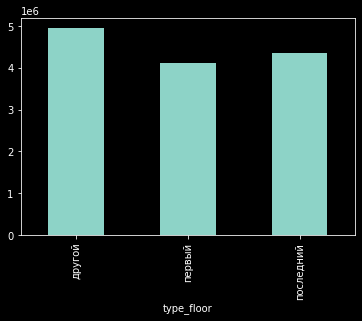

In [67]:
# рассмотрим как тип этажа влияет на цену
data.groupby('type_floor')['last_price'].mean().plot.bar()
plt.show()

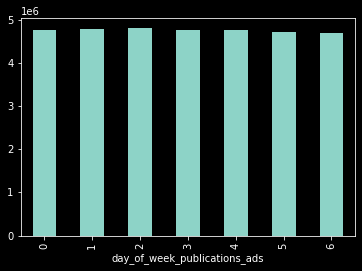

In [68]:
# рассмотрим как день публикации влияет на цену
data.groupby('day_of_week_publications_ads')['last_price'].mean().plot.bar()
plt.show()

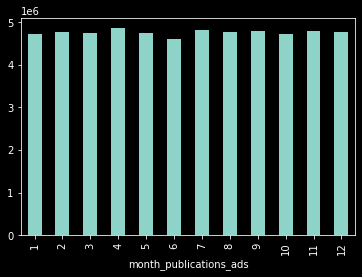

In [69]:
# рассмотрим как месяц публикации влияет на цену
data.groupby('month_publications_ads')['last_price'].mean().plot.bar()
plt.show()

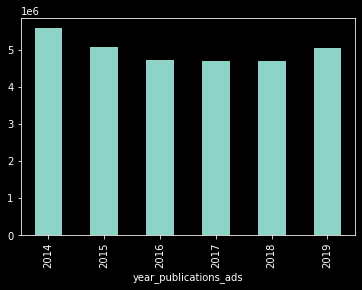

In [70]:
# рассмотрим как год публикации влияет на цену
data.groupby('year_publications_ads')['last_price'].mean().plot.bar()
plt.show()

Построив матрицу корреляции и рассмотрев ее диаграму можно сказать, что общая площадь сильно влияет на цену, у них сильная положительная связь, т.е. с ростом площади увеличивается и цена. Сильно влияют жилая площадь и площадь кухни, число комнат мало влияет на цену. На последнем этаже продаются самые дорогие квартиры, на первом самые дешевые. День и месяц публикации не влияют на цену, а вот год влияет: с 2014 года цены на недвижимость сильно, с 2015 по 2016 было небольшое снижение цен, а в 2019 цена выросла. Однако в 2014 году было опубликовано мало объявлений, поэтому не надо учитывать этот спад цен.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [71]:
# сгруппируем данные по местонахождению, а потом 
#  посчитаем кол-во и медианное значение для цены за квадратный метр, 
#  отсортируем по кол-ву объявлений и отберем первые 10 
data_locality_name = (
    data
    .groupby(by='locality_name')
    .agg({'price_of_one_square_meter' : ['median', 'count']})
) 

data_locality_name.columns = ['average_price_per_square_meter', 'count']
data_locality_name = (
    data_locality_name
    .sort_values(by='count', ascending=False)
    .head(10)
)
# построим табл. 10 самых населенных пунктов по кол-ву объявлений и 
# выделим максимальные и минимальные значения в ней
(
    data_locality_name
    .sort_values(by='average_price_per_square_meter', ascending=False)
    .style
    .highlight_max(color='green', subset=['average_price_per_square_meter', 'count'])
    .highlight_min(color='coral', subset=['average_price_per_square_meter', 'count'])
    .format({'average_price_per_square_meter':'{:.0f}'})
)

,average_price_per_square_meter,count
locality_name,,
Санкт-Петербург,101486,13174
Пушкин,98455,330
поселок Парголово,91643,325
деревня Кудрово,91429,279
поселок Мурино,84239,515
поселок Шушары,76626,432
Колпино,74658,335
Гатчина,67861,300
Всеволожск,65789,387


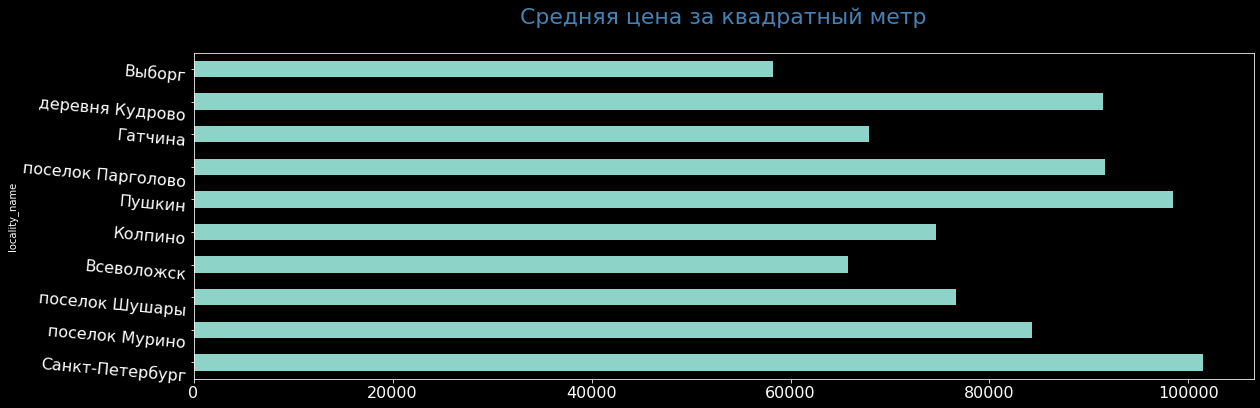

In [72]:
# построим график средней цены за квадратный метр отсартированнное по кол-ву объявлений в этом городе
(
    data_locality_name['average_price_per_square_meter']
    .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
    .set_title('Средняя цена за квадратный метр' + "\n", fontsize = 22, color = 'SteelBlue')    
); 

Самые дорогие квадратные метры в СПб и там же максимальное кол-во объявлений, а в Выборге с самым дешевым квадратным метром меньше всего объявлений, но колв-во объявлений не влияет на цену квадратного метра, так в поселок Мурино по кол-ву объявлений на втором месте, а по цене на пятом. 

#### Вычислим среднюю цену каждого километра в Санкт-Петербурге.

In [73]:
# сделаем выборку по городу, затем эти данные сгруппируем по расстоянию от центра города и посчитаем среднюю цену
data_spb = (data
            .query('locality_name=="Санкт-Петербург"')
            .groupby('city_centers_nearest_km')
            .agg({'last_price' : 'mean'})
            .reset_index()
#             .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')
            )
data_spb.head()

,city_centers_nearest_km,last_price
0,0.00,"7,141,428.57"
1,1.00,"7,878,406.97"
2,2.00,"7,836,074.53"
3,3.00,"7,113,074.22"
4,4.00,"7,334,346.61"


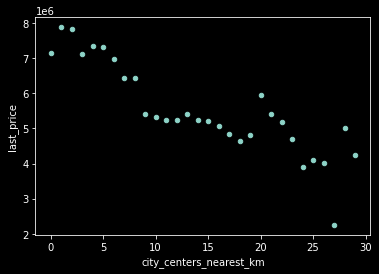

In [74]:
# построим график зависимости удаленности от центра города от цены
data_spb.plot(x='city_centers_nearest_km', y='last_price', kind='scatter')
plt.show()

Самые дорогие квартиры находятся в центре города, чем дальше от центра, тем дешевле квартиры. Однако есть небольшой второй пик на расстоянии в 6 км, дальше идет почти плавное снижение с небольшим пиком в 27 км.

### Общий вывод

Мы рассмотрели  архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет:

1. Изучили общую площадь, жилую площадь, площадь кухни, цену объекта, количество комнат, высоту потолков, этаж квартиры, тип этажа квартиры, общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления и заметили, что для общей площади, жилой площади, площади кухни, цены объекта, количества комнат, высоты потолков, этажа квартиры и расстояния до ближайшего парка распределения похожи на распределения Пуасона. У общего количества этажей в доме, расстояния до центра города в метрах, расстояния до ближайшего аэропорта не похожи на стандартные распределения. 
В выходные объявления публикуют реже, чем в будни, а вторник и четверг - самые публикуемы дни. Февраль, март и апрель - самые публикуемые месяцы, в мае пуликуют меньше всего объявлений. В 2014 году объявлений было опубликовано мало объявлений, в 2017 и 2018 больше всего объявлений.
Меньше всего объявлений для первого этажа, а максимальное для других (ни первый, ни последний) этажей.

2. Рассмотрели как быстро продаются квартиры. У кол-ва дней размещения объявлений распределение Пуасона. В среднем продажа квартиры занимает около 100 дней. Для объявлений 500 дней - долгая продажа, 50 дней - быстрая продажа. С каждым следующим годом квартира продавалась быстрее. Кол-во фотографий влияет на скорость размещения: чем больше фотографий, тем быстрее продажи.
На скорость продаж не влияет населенный пункт, так самые быстро продаваемые объекты и 
самые медленно продаваемые объекты находятся близко и далеко от центра.
Цена также напрямую не влияет на кол-во дней размщения, среди 10 самых быстро продаваемых квартир 
есть дешевые и дорогие квартиры. Надо рассматривать более сложную связь не только цену, но и расположение.

3. Проверили какие факторы больше всего влияют на общую (полную) стоимость объекта и установили, что общая площадь сильно влияет на цену, у них сильная положительная связь. Сильно влияют жилая площадь и площадь кухни, число комнат меньше влияет на цену. На последнем этаже продаются самые дорогие квартиры, на первом самые дешевые. День и месяц публикации не влияют на цену, а вот год влияет: с 2014 года цены на недвижимость упали, с 2015 по 2018 цена была прмерно одинаковой, а в 2019 цена выросла.

4. Посмотрели населённые пункты с самой высокой и низкой стоимостью квадратного метра в 10 населенных пунктах с самым большик колвом объявлений. Оказалось, что самые дорогие квадратные метры в СПб и там же максимальное кол-во объявлений, а в Выборге с самым дешевым квадратным метром меньше всего объявлений, но колв-во объявлений не влияет на цену квадратного метра, так в поселок Мурино по кол-ву объявлений на втором месте, а по цене на пятом.

5. Рассмотрели как стоимость объектов зависит от расстояния до центра города в Санкт-Петербурге. Самые дорогие квартиры находятся в центре города, чем дальше от центра, тем дешевле квартиры. Однако есть небольшой второй пик на расстоянии в 6 км, дальше идет почти плавное снижение с небольшим пиком в 27 км.